<a href="https://colab.research.google.com/github/kennywong524/Stock-Market-Prediction-ML-Project/blob/main/Comparing_TSLA_Price_Prediction_ML_Model_Accuracy_using_LSTM_%26_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TSLA Price Prediction using ML LSTM & LR

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4388    0  4388    0     0  11587      0 --:--:-- --:--:-- --:--:-- 11577
100  517k  100  517k    0     0   246k      0  0:00:02  0:00:02 --:--:--  687k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4408    0  4408    0     0   5984      0 --:--:-- --:--:-- --:--:--  5989
100  392k  100  392k    0     0   168k      0  0:00:02  0:00:02 --:--:--  277k


In [ ]:
import yfinance as yf

tsla = msft = yf.Ticker("TSLA")
print(tsla)

yfinance.Ticker object <TSLA>


In [ ]:
!pip install yfinance

In [ ]:
!sudo pip3 install keras

In [ ]:
import pandas as pd
import numpy as np

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [ ]:
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [ ]:
# get historical market data
tsla.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-06 00:00:00-05:00,179.990005,181.580002,173.699997,176.539993,107920900,0.0,0.0
2024-03-07 00:00:00-05:00,174.350006,180.039993,173.699997,178.649994,102129000,0.0,0.0
2024-03-08 00:00:00-05:00,181.500000,182.729996,174.699997,175.339996,85315300,0.0,0.0


In [ ]:
# show dividends
tsla.dividends

Series([], Name: Dividends, dtype: float64)

In [ ]:
# show splits
tsla.splits

Date
2020-08-31 00:00:00-04:00    5.0
2022-08-25 00:00:00-04:00    3.0
Name: Stock Splits, dtype: float64

# Yahoo Finance directory

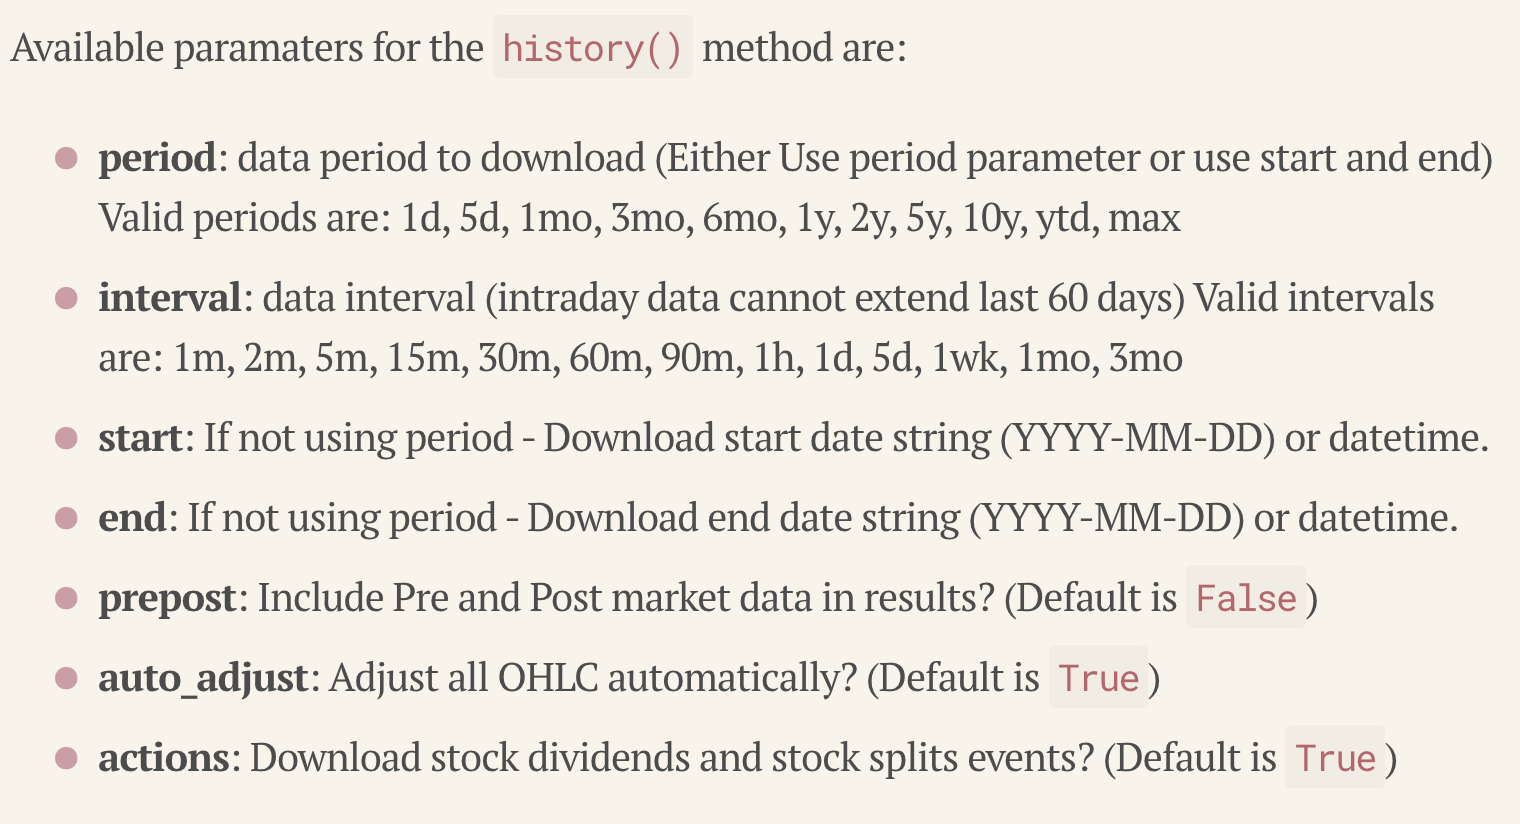

# Data Cleaning

In [ ]:
# fetching TSLA data from 2020 - 2024

tsla_data = yf.download("TSLA", start="2019-12-31", end="2024-03-13")
tsla_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
...,...,...,...,...,...,...
2024-03-06,179.990005,181.580002,173.699997,176.539993,176.539993,107920900
2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000
2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300


In [ ]:
tsla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


In [ ]:
tsla_data.isnull().sum() #no null row

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tsla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1.056000e+03
mean,208.668902,213.350567,203.593578,208.580472,208.580472,1.319512e+08
std,84.239612,85.898091,82.277666,84.047451,84.047451,8.680473e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,164.427505,167.499168,160.397499,164.033333,164.033333,7.906590e+07
50%,221.591667,226.325005,216.216667,221.034996,221.034996,1.067990e+08
75%,260.178345,265.640007,256.253334,260.515007,260.515007,1.533709e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
# closing price
tsla_close = tsla_data.sort_values('Close')
tsla_close

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
...,...,...,...,...,...,...
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
2021-11-01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100
2021-11-03,392.443329,405.130005,384.206665,404.619995,404.619995,103885500


Moving averages & RSI metrics

1. **RSI:** The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30.

2. **Moving Averages:** A moving average is a statistic that captures the average change in a data series over time. In finance, moving averages are often used by technical analysts to keep track of price trends for specific securities. An upward trend in a moving average might signify an upswing in the price or momentum of a security, while a downward trend would be seen as a sign of decline.

In [ ]:
# Calculate RSI of TSLA

tsla_data['RSI'] = talib.RSI(tsla_data['Close'])
tsla_data.dropna()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2020-01-22,38.125999,39.633331,37.273335,37.970669,37.970669,470535000,82.307206
2020-01-23,37.616669,38.799999,37.040001,38.146667,38.146667,294765000,82.519544
2020-01-24,38.042000,38.257332,36.950668,37.654667,37.654667,215304000,79.642038
2020-01-27,36.132668,37.629333,35.952000,37.201332,37.201332,204121500,76.978452
2020-01-28,37.899334,38.453999,37.205334,37.793331,37.793331,176827500,78.012605
...,...,...,...,...,...,...,...
2024-03-06,179.990005,181.580002,173.699997,176.539993,176.539993,107920900,33.301639
2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,35.607311
2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,33.642587


# Data Visualization

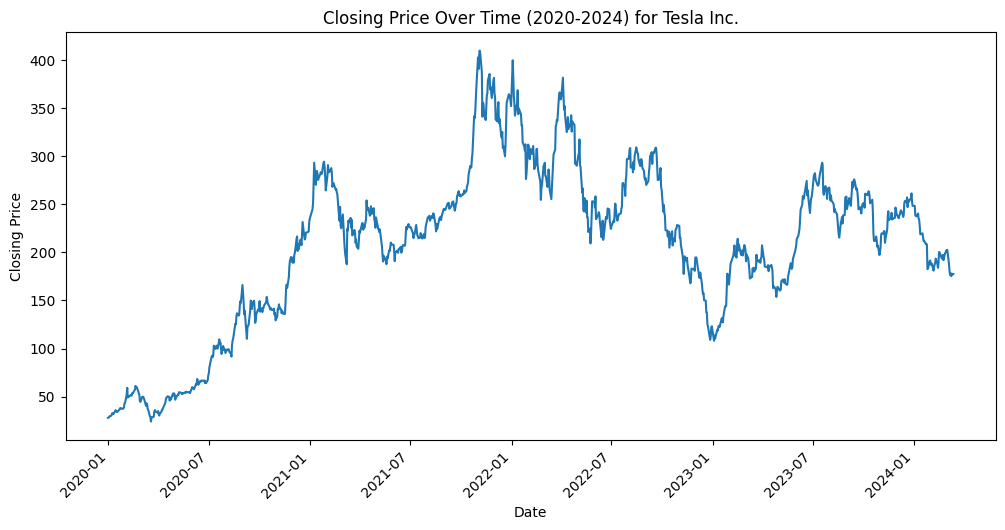

In [ ]:
   # Plotting the stock closing price over time

plt.figure(figsize=(12, 6))
tsla_data['Adj Close'].plot()
plt.title(f'Closing Price Over Time (2020-2024) for Tesla Inc.')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

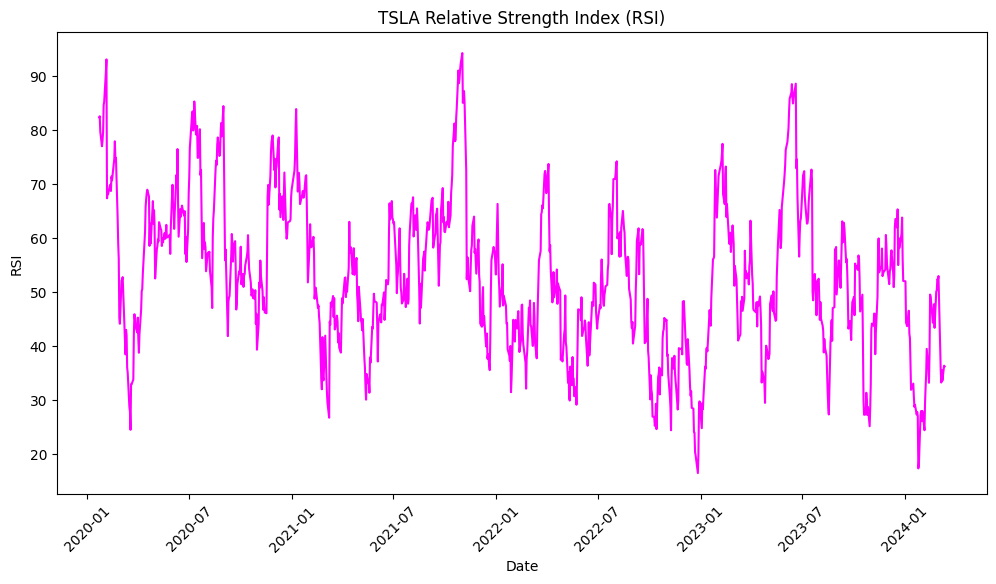

In [ ]:
# Plotting RSI of TSLA over time
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['RSI'], color='magenta')
plt.title('TSLA Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.show()

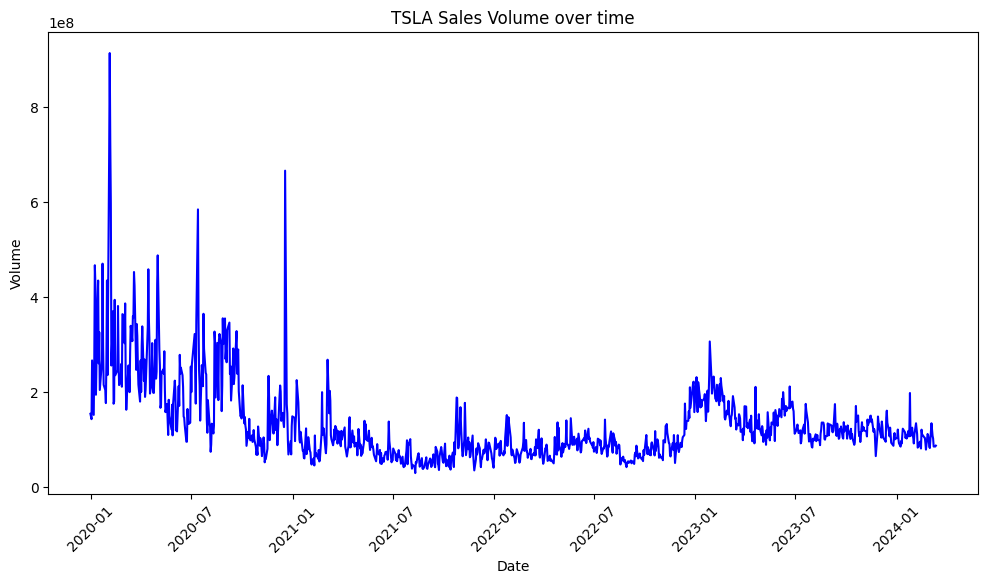

In [ ]:
# Plot the total volume of TSLA stock being traded each day

plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Volume'], color='blue')
plt.title('TSLA Sales Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

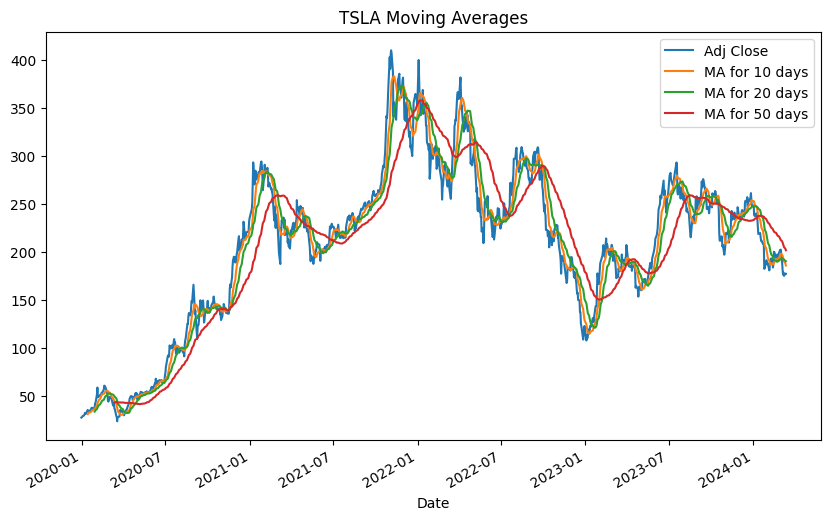

In [ ]:
# Moving averages for TSLA
ma_day = [10, 20, 50]

for ma in ma_day:
   column_name = f"MA for {ma} days"
   tsla_data[column_name] = tsla_data['Adj Close'].rolling(ma).mean()


tsla_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10, 6))
plt.title('TSLA Moving Averages')
plt.show()

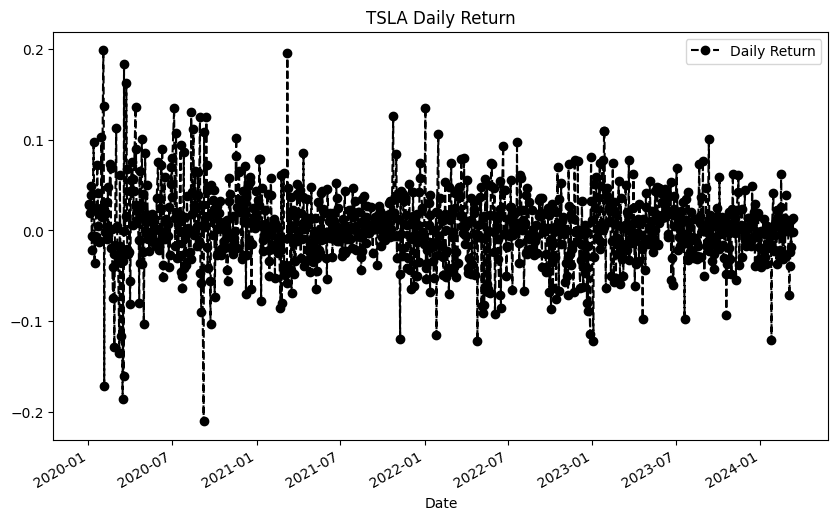

In [ ]:
# plot daily return for TSLA

# We'll use pct_change to find the percent change for each day
tsla_data['Daily Return'] = tsla_data['Adj Close'].pct_change()

tsla_data['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o', color = 'black')
plt.title('TSLA Daily Return')
plt.show()

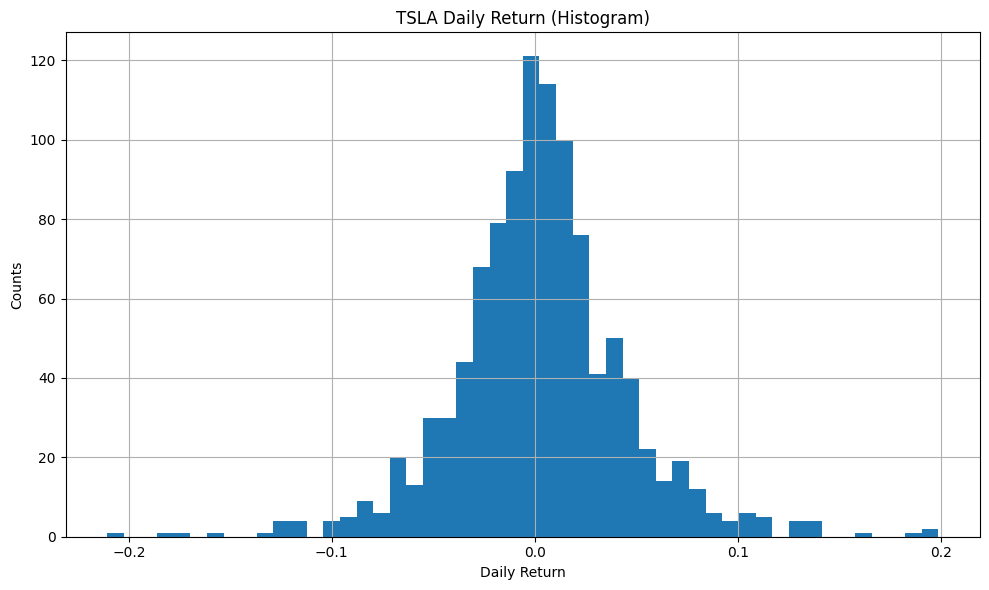

In [ ]:
# let's get an overall look at the average daily return using a histogram.
# We'll use seaborn to create both a histogram and kde plot on the same figure.

plt.figure(figsize=(10, 6))
tsla_data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('TSLA Daily Return (Histogram)')

plt.tight_layout()

# Modeling